## Visual stock valuation

- This file contains code to visualize a football field analysis, while also calculating a price forecast, and a plot for visualizing the time progression of a multiple and it's average.

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Determine your own file path
file_path = '...'

## 1. Football field valuation analysis

- This code will output an visual representation of your multiples and will calculate the mean of the median of the individual multiples
- Manually change the multiple name and range according to your results in valuation_methods.
- In filtered_medians you can exclude more than the 52 week trading range in your price forecast calculation.

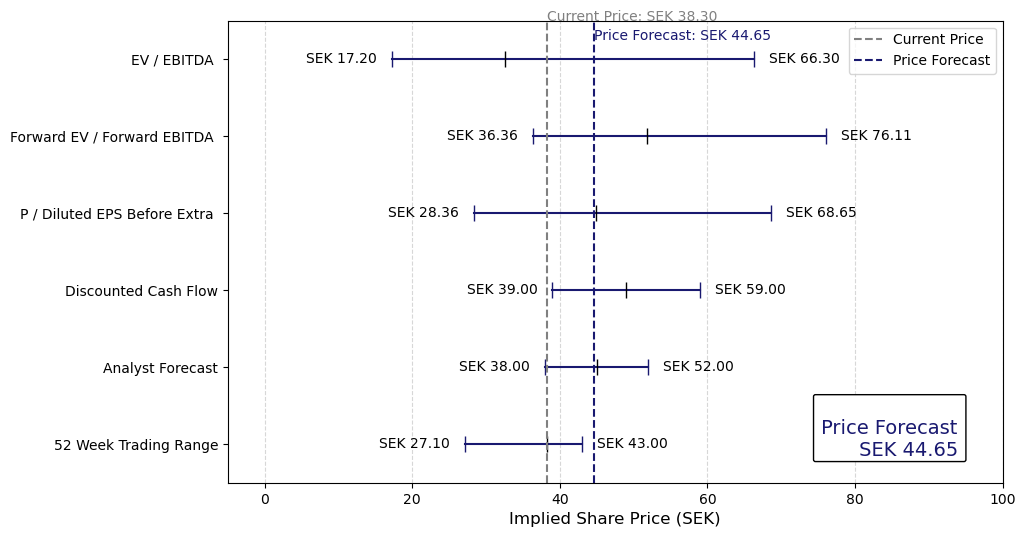

In [ ]:
# Sample dataset using a dictionary
valuation_methods = {
    '52 Week Trading Range': {'lower_bound': 27.1, 'upper_bound': 43, 'median': 38.3},
    'Analyst Forecast': {'lower_bound': 38, 'upper_bound': 52, 'median': (38 + 52) / 2},
    'Discounted Cash Flow': {'lower_bound': 39, 'upper_bound': 59, 'median': 49},
    'P / Diluted EPS Before Extra ': {'lower_bound': 28.36, 'upper_bound': 68.65, 'median': 44.85},
    #'P / NAV ': {'lower_bound': 8.79, 'upper_bound': 40.6, 'median': 22.03},
    'Forward EV / Forward EBITDA ': {'lower_bound': 36.36, 'upper_bound': 76.11, 'median': 51.8},
    'EV / EBITDA ': {'lower_bound': 17.2, 'upper_bound': 66.3, 'median': 32.6}
}

# Define the current price and price projection
current_price = 38.3  # Current price

# Calculate price projection as the mean of the median values, excluding '52 Week Trading Range'
filtered_medians = [bounds['median'] for method, bounds in valuation_methods.items() if method != '52 Week Trading Range']
price_projection = sum(filtered_medians) / len(filtered_medians)

# Function to plot the valuation methods
def plot_valuation_methods(valuation_methods, current_price, price_projection):
    fig, ax = plt.subplots(figsize=(10, 6))

    for i, (method, bounds) in enumerate(valuation_methods.items()):
        lower_bound = bounds['lower_bound']
        upper_bound = bounds['upper_bound']
        median_value = bounds['median']
        
        ax.plot([lower_bound, upper_bound], [i, i], marker='|', markersize=12, color='midnightblue')
        ax.plot(median_value, i, marker='|', markersize=12, color='black')  # Small tick for median
        ax.text(lower_bound - 2, i, f'SEK {lower_bound:.2f}', verticalalignment='center', fontsize=10, ha='right')
        ax.text(upper_bound + 2, i, f'SEK {upper_bound:.2f}', verticalalignment='center', fontsize=10)

    # Plot current price line
    ax.axvline(x=current_price, color='grey', linestyle='--', label='Current Price')
    ax.text(current_price, len(valuation_methods) - 0.5, f'Current Price: SEK {current_price:.2f}', 
             color='grey', fontsize=10, ha='left')

    # Plot price projection line
    ax.axvline(x=price_projection, color='midnightblue', linestyle='--', label='Price Forecast')
    ax.text(price_projection, len(valuation_methods) - 0.75, f'Price Forecast: SEK {price_projection:.2f}', 
             color='midnightblue', fontsize=10, ha='left')

    # Customize plot aesthetics
    ax.set_yticks(range(len(valuation_methods)))
    ax.set_yticklabels(list(valuation_methods.keys()))
    ax.set_xlabel('Implied Share Price (SEK)', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xlim(-5, 100)
    ax.set_ylim(-0.5, len(valuation_methods) - 0.5)
    ax.legend(loc='upper right', frameon=True)


    # Add summary box with price forecast
    textstr = f'\n Price Forecast \n SEK {price_projection:.2f} '
    props = dict(boxstyle = 'round,pad=0.1', facecolor='white', alpha=1)
    ax.text(0.95, 0.05, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='bottom', horizontalalignment='right', bbox=props, color = 'midnightblue')
    
    plt.show()

# Call the plotting function
plot_valuation_methods(valuation_methods, current_price, price_projection)


## 2. Time progression of a multiple

- Determine the sheet_name your data is in.

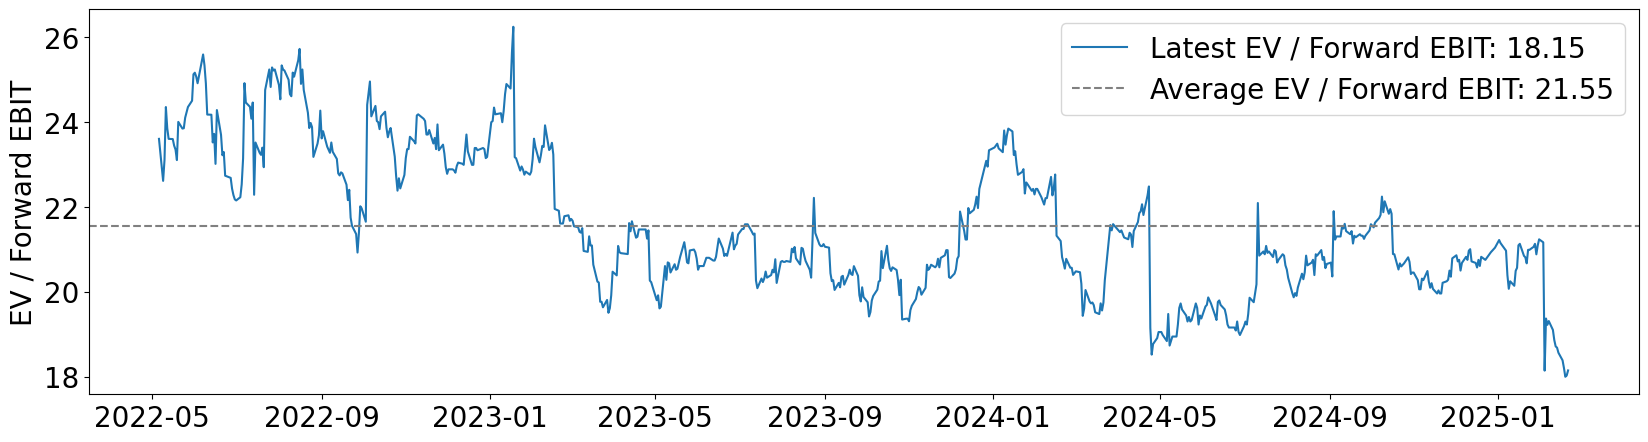

In [ ]:
# Replace 'path_to_file.xlsx' with the actual path to your Excel file
sheet_name = 'Sheet1'  # Specify the sheet name if it's not the first sheet

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Ensure the first column is parsed as dates
df['Date'] = pd.to_datetime(df.iloc[:, 0])

# Extract the date and stock price columns
date = df['Date']
stock_price = df.iloc[:, 1]

# Calculate the average stock price
average_price = stock_price.mean()

# Get the latest price
latest_price = stock_price.iloc[-1]

# Plot the data
plt.figure(figsize=(20, 5))  # Adjusted the width to 20
plt.plot(date, stock_price, label=f'Latest EV / Forward EBIT: {latest_price:.2f}')
plt.axhline(y=average_price, color='grey', linestyle='--', label=f'Average EV / Forward EBIT: {average_price:.2f}')
#plt.xlabel('Date')
plt.ylabel('EV / Forward EBIT', fontsize=20)
#plt.title('Stock Price Over Time')
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
plt.show()